 # Assingment 1

 Implement the following numerical methods to find the solution of the integral $\int_{0}^{\pi/4} e^{2x}sin(2x) \, dx$:

 - Left Riemann sum
 - Right Riemann sum
 - Trapezoid rule
 - Simpson rule

 The real value is $\frac{3}{13} e^{3\pi/4} + \frac{2}{13}$

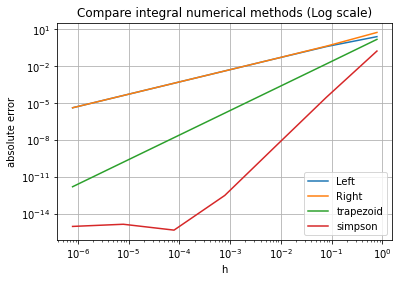

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def leftParallelogram(func, a, b, N):
    h = (b-a)/(N-1)
    xLeft = np.linspace(a,b,N)
    output = func(xLeft)
    return np.sum(output[:-1] * h)

def rightParallelogram(func, a, b, N):
    h = (b-a)/(N-1)
    xRight = np.linspace(a,b,N)
    output = func(xRight)
    return np.sum(output[1:] * h)

def trapezoid(func, a, b, N):
    h = (b-a)/(N-1)
    input = np.linspace(a,b,N)
    output = func(input)
    return h/2 * (output[0] + 2*np.sum(output[1:N-1]) + output[N-1])

def simpson(func, a, b, N):
    h = (b-a)/(N-1)
    input = np.linspace(a,b,N)
    output = func(input)
    return (h/3) * (output[0] + 2*np.sum(output[:N-2:2]) + 4*np.sum(output[1:N-1:2]) + output[N-1])

N = np.array([10**i for i in range(0,7)])
N = N + 1 # to create N intervals
a, b = 0, np.pi / 4
h = (b-a)/(N-1)
func = lambda x: np.exp(3 * x) * np.sin(2 * x)
realValue = 3/13 * np.exp(3*np.pi/4) + 2/13

left = [abs(realValue - leftParallelogram(func, a, b, i)) for i in N]
right = [abs(realValue - rightParallelogram(func, a, b, i)) for i in N]
trap = [abs(realValue - trapezoid(func, a, b, i)) for i in N]
sims = [abs(realValue - simpson(func, a, b, i)) for i in N]

plt.figure()
plt.loglog(h, left, label = 'Left')
plt.loglog(h, right, label = 'Right')
plt.loglog(h, trap, label = 'trapezoid')
plt.loglog(h, sims, label = 'simpson')
plt.title("Compare integral numerical methods (Log scale)")
plt.xlabel("h")
plt.ylabel("absolute error")
plt.grid()
plt.legend()

 # Conclusions

 We can observe that as we increase the order of the polynomial interpolation, the smaller the absolute error is.

 # Assignment 2

 We have the following system of first order differential equations:

 $x_o' = 1.1x_o - 0.4x_0x_1$

 $x_1' = 0.4x_ox_1 - 0.1x_1$

 - Solve the system with Euler's method, $x_0(0) = 20$, $x_1(0) = 1$, $t_{max} = 200$ and small $dt=0.1$
 - Change $dt=0.01$. What do you observe?


[20.         21.4        22.22176    ... 72.24163272 76.32937013
 68.90746121]


Text(0, 0.5, 'Foxes state')

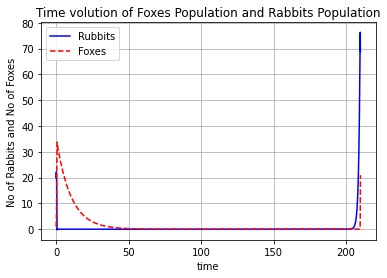

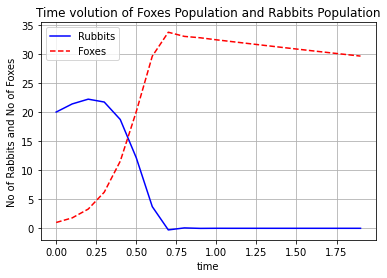

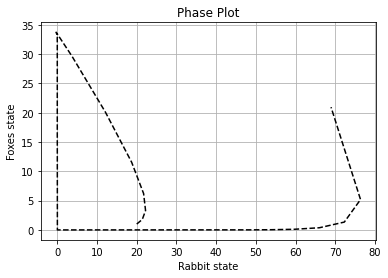

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def euler(F,x0,t0,tmax,dt):
    t = np.arange(t0,tmax,dt)
    x = np.zeros((len(t), len(x0)))
    x[0,:] = x0
    for n in range(len(t) - 1):
        x[n+1,:] = x[n,:] + dt*F(t[n], x[n,:])
    return t,x

F = lambda t,x: np.array([1.1*x[0] - 0.4*x[0]*x[1], 0.4*x[0] * x[1] - 0.1*x[1]])
x0 = [20, 1]
t0, tmax, dt = 0, 210, 0.1
t, x = euler(F,x0,t0,tmax,dt)
print(x[:,0])

## PLOTS
plt.figure()
plt.plot(t,x[:,0],'b-', label='Rubbits')
plt.plot(t,x[:,1],'r--', label='Foxes')
plt.grid()
plt.title('Time volution of Foxes Population and Rabbits Population')
plt.legend()
plt.xlabel('time')
plt.ylabel('No of Rabbits and No of Foxes')

# zoom in version
plt.figure()
plt.plot(t[0:20],x[0:20,0],'b-', label='Rubbits')
plt.plot(t[0:20],x[0:20,1],'r--', label='Foxes')
plt.grid()
plt.title('Time volution of Foxes Population and Rabbits Population')
plt.legend()
plt.xlabel('time')
plt.ylabel('No of Rabbits and No of Foxes')

plt.figure()
plt.plot(x[:,0], x[:,1], 'k--')
plt.grid()
plt.title('Phase Plot')
plt.xlabel('Rabbit state')
plt.ylabel('Foxes state')

[2.00000000e+01 2.01400000e+01 2.02746158e+01 ... 2.35451241e-12
 2.38038774e-12 2.40654745e-12]


Text(0, 0.5, 'Foxes state')

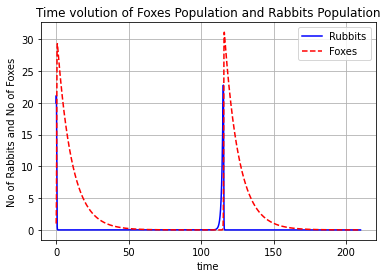

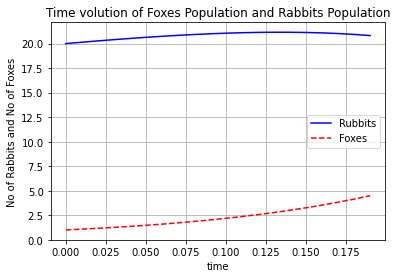

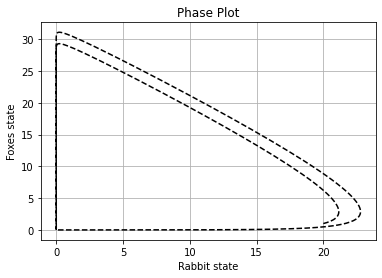

In [20]:
# increasing the step size

x0 = [20, 1]
t0, tmax, dt = 0, 210, 0.01
t, x = euler(F,x0,t0,tmax,dt)
print(x[:,0])

## PLOTS
plt.figure()
plt.plot(t,x[:,0],'b-', label='Rubbits')
plt.plot(t,x[:,1],'r--', label='Foxes')
plt.grid()
plt.title('Time volution of Foxes Population and Rabbits Population')
plt.legend()
plt.xlabel('time')
plt.ylabel('No of Rabbits and No of Foxes')

# zoom in version
plt.figure()
plt.plot(t[0:20],x[0:20,0],'b-', label='Rubbits')
plt.plot(t[0:20],x[0:20,1],'r--', label='Foxes')
plt.grid()
plt.title('Time volution of Foxes Population and Rabbits Population')
plt.legend()
plt.xlabel('time')
plt.ylabel('No of Rabbits and No of Foxes')

plt.figure()
plt.plot(x[:,0], x[:,1], 'k--')
plt.grid()
plt.title('Phase Plot')
plt.xlabel('Rabbit state')
plt.ylabel('Foxes state')

 # Conclusions

- As the foxes increase, the rubbits decrease. When the rubbits are zero, then the foxes decrease until zero
- Increasing the step size, we can observe how crucial it is for the divergence of the original solution of the differential equation. As we can see with step size 0.1, we lost the flow of the solution, that the smaller step clearly pinpoints.